In [230]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

_data = pd.read_csv('인사이콘3_Data.csv')
data = pd.read_csv('data_2.csv')
data.head()

,Active,Achievement,Confidence,Tech,Basic,Q3,Entertaining,Water_Activity,Own,With_Family,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,1.603504,1.925999,0.588489,2.312300,-1.403017,-0.215617,0.695586,0.646742,0.808924,-0.263064,...,0.038515,0.115106,0.097700,0.015707,1.826135,0.406008,0.137651,0.439300,-0.709559,1.003205
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,-0.215617,0.729948,0.575782,1.468832,0.589595,...,0.038515,-1.228438,-1.290331,0.015707,-0.336778,-0.739529,-1.188421,-0.740977,1.409326,1.003205
2,-0.412127,1.290524,0.255103,1.639500,-1.675826,1.204830,0.500458,0.565392,0.712959,-0.333501,...,1.445548,-1.228438,-1.290331,1.441031,-1.418234,0.406008,-1.188421,1.619576,1.409326,-0.996806
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-0.215617,-1.140026,0.586112,-0.215492,-0.616949,...,0.038515,0.115106,0.097700,0.015707,-1.418234,1.551545,1.463723,0.439300,1.409326,-0.996806
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.215617,-0.518371,0.424146,-0.264416,-0.131743,...,0.038515,0.115106,1.485731,1.441031,-0.336778,0.406008,1.463723,0.439300,-0.709559,-0.996806


In [234]:
Q16 = _data.iloc[:,-30:-2]
Q16.head()

,Q16,Q16.1,Q16.2,Q16.3,Q16.4,Q16.5,Q16.6,Q16.7,Q16.8,Q16.9,...,Q16.18,Q16.19,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27
0,28,3,4,4,3,4,4,4,4,4,...,4,4,4,4,4,4,5,4,4,4
1,28,3,3,4,3,3,3,4,4,5,...,4,3,4,3,3,4,3,3,3,3
2,48,4,4,3,4,3,5,5,4,5,...,4,5,5,3,3,5,2,4,3,5
3,40,4,4,4,4,5,4,5,4,5,...,5,4,4,4,4,4,2,5,5,4
4,19,5,5,5,5,5,4,1,5,5,...,4,4,4,4,5,5,3,4,5,4


In [203]:
df = Q16.groupby('Q16').mean().reset_index()
df.head()

,Q16,Q16.1,Q16.2,Q16.3,Q16.4,Q16.5,Q16.6,Q16.7,Q16.8,Q16.9,...,Q16.18,Q16.19,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27
0,1,3.721805,3.699248,3.496241,3.766917,3.511278,3.691729,3.759398,3.842105,3.977444,...,3.774436,3.977444,3.909774,3.857143,3.992481,4.060150,3.165414,3.398496,3.849624,3.503759
1,2,3.166667,3.166667,2.833333,3.500000,3.500000,3.500000,3.500000,3.333333,3.166667,...,3.833333,3.500000,3.833333,3.500000,3.833333,3.833333,3.333333,3.833333,3.666667,3.666667
2,3,3.696629,3.464419,3.659176,3.895131,3.681648,3.764045,3.816479,4.007491,3.988764,...,3.835206,3.895131,4.044944,4.078652,3.977528,4.056180,3.284644,3.644195,3.898876,3.617978
3,4,3.018182,3.272727,3.672727,3.527273,3.690909,3.800000,3.836364,3.872727,3.818182,...,3.818182,3.818182,3.800000,4.090909,3.672727,3.927273,3.563636,3.290909,3.836364,3.454545
4,5,3.787330,3.769231,3.742081,3.823529,3.656109,3.873303,3.972851,4.104072,3.886878,...,4.072398,4.018100,4.045249,3.891403,3.995475,3.995475,3.484163,3.773756,3.986425,3.570136


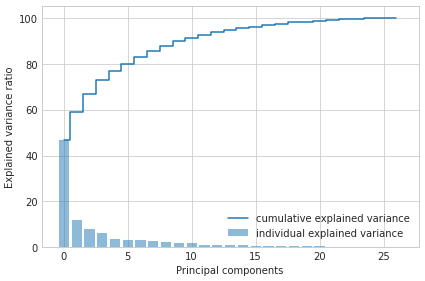

In [204]:
cov_mat = np.cov(df.iloc[:,1:].T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(df.columns)-1), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(df.columns)-1), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [205]:
eig_vals

array([0.95423853, 0.24353584, 0.15965686, 0.12908936, 0.07681386,
       0.06534467, 0.06047089, 0.05193446, 0.04603233, 0.04061707,
       0.0343841 , 0.02294459, 0.02212538, 0.01899634, 0.01711486,
       0.01570464, 0.01380184, 0.01275611, 0.00189858, 0.00258836,
       0.00974939, 0.0088185 , 0.00368862, 0.00450791, 0.00744733,
       0.00589193, 0.00623812])

In [208]:
print(f'성분의 개수 {len([val for val in eig_vals if val>0.1])}')

성분의 개수 4


In [260]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
df_pca = pca.fit_transform(df.iloc[:,1:])

Q16_reducted = pd.concat([df[['Q16']],pd.DataFrame(df_pca, columns=['equi1','equi2','equi3','equi4'])],axis=1)
Q16_reducted.head()

,Q16,equi1,equi2,equi3,equi4
0,1,0.520056,0.316541,0.065676,0.495024
1,2,1.066645,-0.182450,-0.953092,-0.595359
2,3,-0.124715,-0.260240,0.092643,0.164843
3,4,0.557370,-0.389673,-0.074367,-0.429356
4,5,-0.062972,0.472137,0.135263,0.237678


In [254]:
data_3 = _data.iloc[:,1:].merge(Q16_reducted)
data_3.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18,equi1,equi2,equi3,equi4
0,5,1,5,5,5,5,5,3,5,4,...,5,4,4,4,0,1,-0.587014,-0.152052,-0.00156,-0.10948
1,3,2,4,4,4,4,5,3,4,4,...,3,3,3,3,1,1,-0.587014,-0.152052,-0.00156,-0.10948
2,5,3,3,4,4,3,4,3,4,2,...,2,4,3,3,0,1,-0.587014,-0.152052,-0.00156,-0.10948
3,4,3,4,4,4,4,4,4,4,4,...,4,3,4,5,0,1,-0.587014,-0.152052,-0.00156,-0.10948
4,5,2,4,4,4,4,4,4,4,4,...,2,3,4,3,0,1,-0.587014,-0.152052,-0.00156,-0.10948


In [255]:
scaler = StandardScaler()
data_3['Q17'] = data_3['Q17'].apply(lambda x: -1 if x==0 else 1)
data_3['Q18'] = data_3['Q18'].apply(lambda x: -1 if x==0 else 1)
data_3['preference'] = data_3.apply(lambda x: x['Q17']+x['Q18'], axis=1)
data_3['preference'] = scaler.fit_transform(data_3[['preference']])
data_3.head()

for idx in ['equi'+str(i) for i in range(1,5)]:
    data_3[idx] *= data_3['preference']
data_3.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.25,Q16.26,Q16.27,Q17,Q18,equi1,equi2,equi3,equi4,preference
0,5,1,5,5,5,5,5,3,5,4,...,4,4,4,-1,1,-0.134439,-0.034823,-0.000357,-0.025073,0.229022
1,3,2,4,4,4,4,5,3,4,4,...,3,3,3,1,1,-0.940787,-0.243688,-0.002500,-0.175460,1.602667
2,5,3,3,4,4,3,4,3,4,2,...,4,3,3,-1,1,-0.134439,-0.034823,-0.000357,-0.025073,0.229022
3,4,3,4,4,4,4,4,4,4,4,...,3,4,5,-1,1,-0.134439,-0.034823,-0.000357,-0.025073,0.229022
4,5,2,4,4,4,4,4,4,4,4,...,3,4,3,-1,1,-0.134439,-0.034823,-0.000357,-0.025073,0.229022


In [258]:
data.drop(['Q16.'+str(i) for i in range(1,28)], axis=1, inplace=True)
data.drop(['Q16','Q17','Q18'], axis=1, inplace=True)
data = pd.concat([data, data_3.iloc[:,-5:-1]],axis=1)
data.head()

,Active,Achievement,Confidence,Tech,Basic,Q3,Entertaining,Water_Activity,Own,With_Family,...,Q12,Q13,Q14,Q15,Q17,Q18,equi1,equi2,equi3,equi4
0,1.603504,1.925999,0.588489,2.312300,-1.403017,-0.215617,0.695586,0.646742,0.808924,-0.263064,...,1.200646,1.629578,-0.662915,-0.474762,-0.709559,1.003205,-0.134439,-0.034823,-0.000357,-0.025073
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,-0.215617,0.729948,0.575782,1.468832,0.589595,...,0.770073,1.629578,-0.662915,-1.346503,1.409326,1.003205,-0.940787,-0.243688,-0.002500,-0.175460
2,-0.412127,1.290524,0.255103,1.639500,-1.675826,1.204830,0.500458,0.565392,0.712959,-0.333501,...,0.124213,1.629578,-0.662915,-1.346503,1.409326,-0.996806,-0.134439,-0.034823,-0.000357,-0.025073
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-0.215617,-1.140026,0.586112,-0.215492,-0.616949,...,-0.091074,1.629578,-0.662915,-1.346503,1.409326,-0.996806,-0.134439,-0.034823,-0.000357,-0.025073
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.215617,-0.518371,0.424146,-0.264416,-0.131743,...,-0.091074,1.629578,-0.662915,-1.346503,-0.709559,-0.996806,-0.134439,-0.034823,-0.000357,-0.025073


In [259]:
data.to_csv('data_3.csv', index=False)